 Consider the numerical features and the column (Blood-Donor and Non-Blood-Donor)
related with possible class labels.
(a) Use z-score to normalize the features.
(b) Reduce the dimension of the feature vector to 2 using the PCA model.
• By visual inspection the new data allows to discriminate between the two
classes?
• What is explained variance of the data with two principal components?
• How many components should be estimated to keep 90% of the variance.
(c) Reduce the dimension of the feature vector with KPCA model (and RBF kernel).


In [1]:
 #Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import numpy as np
import pandas as pd
import math
# graphics and maths
#Numerical python functions written for compatability with MATLAB commands with the same names.
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.mlab as mlab

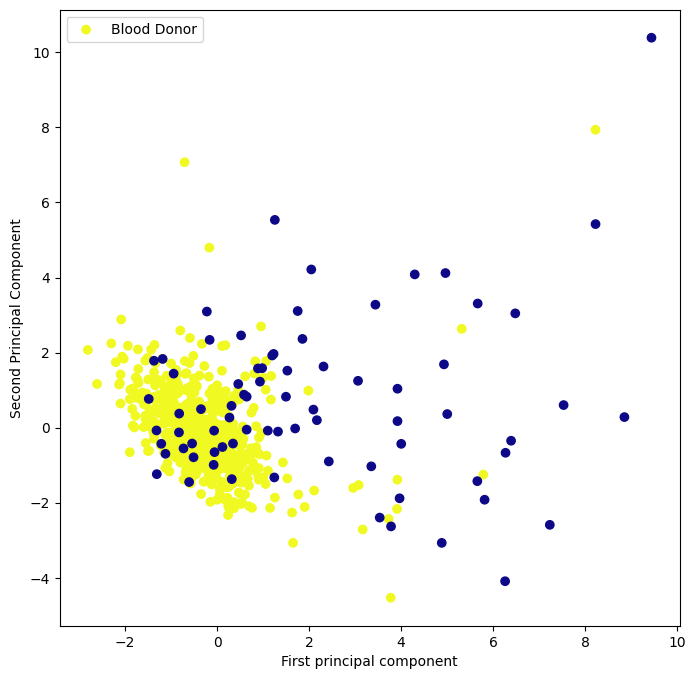

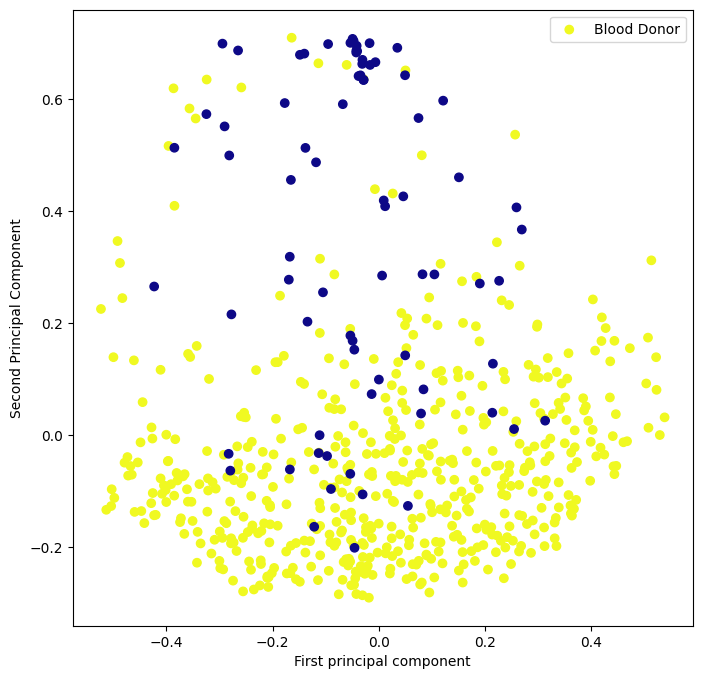

In [39]:
# Consider the numerical features and the column (Blood-Donor and Non-Blood-Donor) related with possible class labels

# Read the data from the file only the columns of interest
# The data is in the file hcvdat0.csv

# consider the numerical features and the column (Blood-Donor and Non-Blood-Donor) related with possible class labels

df=pd.read_csv('hcvdat0.csv',usecols=['Category','Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT'])
df

#pass Category to donor(1) and non-donor(0)
df['Category']=df['Category'].replace(['0=Blood Donor','1=Hepatitis','0s=suspect Blood Donor','2=Fibrosis','3=Cirrhosis'],[1,0,1,0,0])
#Use z-score to normalize the features.
#NaN values are replaced with similar person with same age
df.ALB=df['ALB'].fillna(df.groupby('Age')['ALB'].transform('mean'))
df.ALP=df['ALP'].fillna(df.groupby('Age')['ALP'].transform('mean'))
df.ALT=df['ALT'].fillna(df.groupby('Age')['ALT'].transform('mean'))
df.AST=df['AST'].fillna(df.groupby('Age')['AST'].transform('mean'))
df.BIL=df['BIL'].fillna(df.groupby('Age')['BIL'].transform('mean'))
df.CHE=df['CHE'].fillna(df.groupby('Age')['CHE'].transform('mean'))
df.CHOL=df['CHOL'].fillna(df.groupby('Age')['CHOL'].transform('mean'))
df.CREA=df['CREA'].fillna(df.groupby('Age')['CREA'].transform('mean'))
df.GGT=df['GGT'].fillna(df.groupby('Age')['GGT'].transform('mean'))
df.PROT=df['PROT'].fillna(df.groupby('Age')['PROT'].transform('mean'))

#replace rest of the NaN values with mean of the column
df.ALB=df['ALB'].fillna(df['ALB'].mean())
df.ALP=df['ALP'].fillna(df['ALP'].mean())
df.ALT=df['ALT'].fillna(df['ALT'].mean())
df.AST=df['AST'].fillna(df['AST'].mean())
df.BIL=df['BIL'].fillna(df['BIL'].mean())
df.CHE=df['CHE'].fillna(df['CHE'].mean())
df.CHOL=df['CHOL'].fillna(df['CHOL'].mean())
df.CREA=df['CREA'].fillna(df['CREA'].mean())
df.GGT=df['GGT'].fillna(df['GGT'].mean())
df.PROT=df['PROT'].fillna(df['PROT'].mean())

#z-score normalization
df['Category']=df['Category']-df['Category'].mean()/df['Category'].std()
df['Age']=(df['Age']-df['Age'].mean())/df['Age'].std()
df['ALB']=(df['ALB']-df['ALB'].mean())/df['ALB'].std()
df['ALP']=(df['ALP']-df['ALP'].mean())/df['ALP'].std()
df['ALT']=(df['ALT']-df['ALT'].mean())/df['ALT'].std()
df['AST']=(df['AST']-df['AST'].mean())/df['AST'].std()
df['BIL']=(df['BIL']-df['BIL'].mean())/df['BIL'].std()
df['CHE']=(df['CHE']-df['CHE'].mean())/df['CHE'].std()
df['CHOL']=(df['CHOL']-df['CHOL'].mean())/df['CHOL'].std()
df['CREA']=(df['CREA']-df['CREA'].mean())/df['CREA'].std()
df['GGT']=(df['GGT']-df['GGT'].mean())/df['GGT'].std()
df['PROT']=(df['PROT']-df['PROT'].mean())/df['PROT'].std()
df

#Reduce the dimension of the feature vector to 2 using the PCA model.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
X_pca = pca.transform(df)

#Plot the data in the 2D space using the PCA model.

plt.figure(figsize=(8,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Category'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
#add legend for the class labels
plt.legend(['Blood Donor','Non-Blood Donor'])



#Reduce the dimension of the feature vector with KPCA model (and RBF kernel)

from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
X_reduced = rbf_pca.fit_transform(df)


#Plot the data in the 2D space using the KPCA model.

plt.figure(figsize=(8,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['Category'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

#add legend for the class labels
plt.legend(['Blood Donor','Non-Blood Donor'])




















